In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from trunk_filter.composite_filter import NonCausalTrunkFilter
from trunk_filter.utils import integrate_positions_from_velocity, get_data_array_from_dataframe, get_dataframe_from_data_array

In [123]:
df = pd.read_csv('../data/mass_100g_harmonic_test_1_short/test/1/raw/data.csv')
df1 = pd.read_csv('../data/mass_100g_harmonic_test_1_short/train/raw/data.csv')
index = 4

In [124]:
start = int(0)
delta = 10000
df = df.iloc[start:start+delta]
df1 = df1[start:start+delta]

len(df1)


501

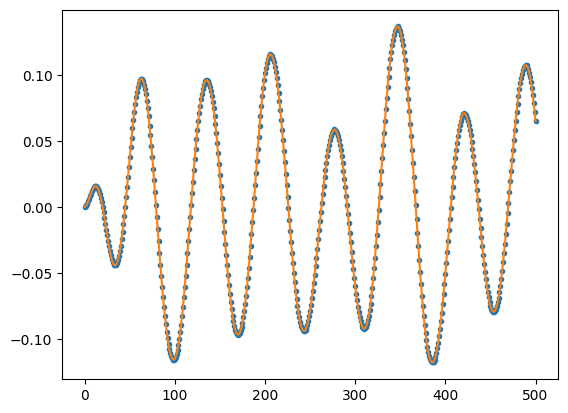

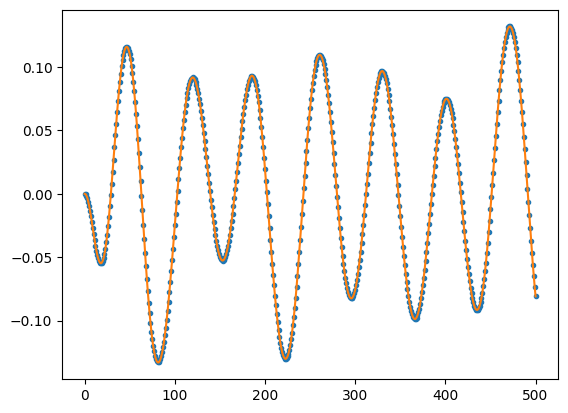

In [125]:
plt.plot(df[f'x{index}'], label='x3', linestyle='None', marker='.')
plt.plot(df1[f'x{index}'], label='x3 (mass 10g)')


plt.figure()
plt.plot(df['y4'], label='y3', linestyle='None', marker='.')
plt.plot(df1['y4'], label='y3 (mass 10g)')


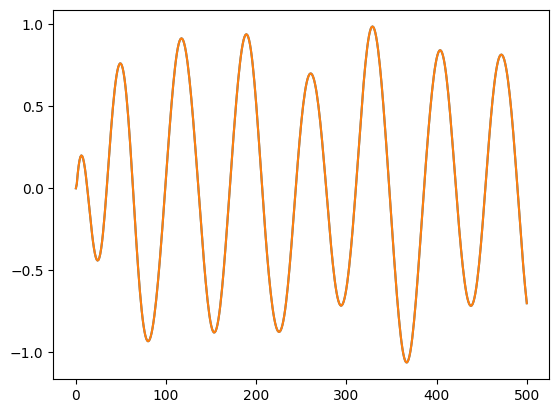

In [126]:
plt.plot(df[f'vx{index}'], label='x3')
plt.plot(df1[f'vx{index}'], label='x3 (mass 100g)')


/tmp/ipykernel_50312/324489957.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


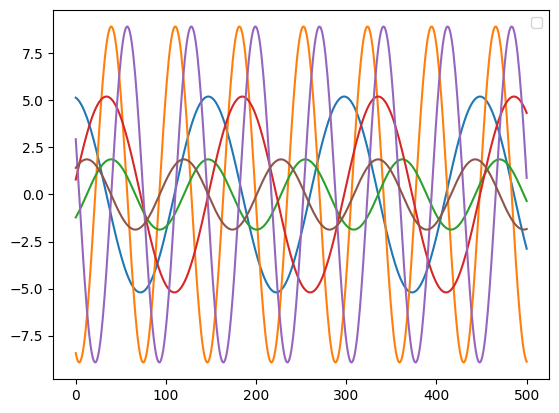

In [127]:
plt.plot(df['ux1'])
plt.plot(df['ux2'])
plt.plot(df['ux3'])
plt.plot(df['uy1'])
plt.plot(df['uy2'])
plt.plot(df['uy3'])


plt.legend()

In [128]:
df['x4'].mean()


np.float64(0.0022019423565844696)

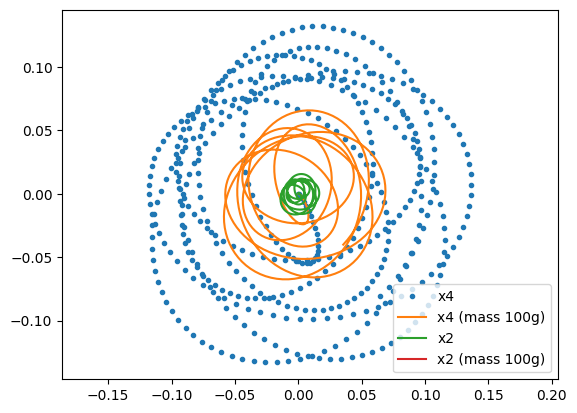

In [129]:
from datetime import datetime

plt.figure()
plt.plot(df['x4'], df['y4'], label='x4' , linestyle='None', marker='.')
plt.plot(df['x3'], df['y3'], label='x4 (mass 100g)')
plt.plot(df['x2'], df['y2'], label='x2')
plt.plot(df['x1'], df['y1'], label='x2 (mass 100g)')


plt.axis('equal')
plt.legend()



In [130]:
centers = []

for i in range(1, 5):
    centers.append([df[f'x{i}'].mean(), df[f'y{i}'].mean(), df[f'z{i}'].mean()])

In [131]:
c = np.array(centers)
print(c)

[[ 0.          0.         -0.01066667]
 [ 0.00036561  0.00037223 -0.10570456]
 [ 0.00125263  0.00147271 -0.20505664]
 [ 0.00220194  0.00287204 -0.29858739]]


In [132]:
c[:,2]

array([-0.01066667, -0.10570456, -0.20505664, -0.29858739])

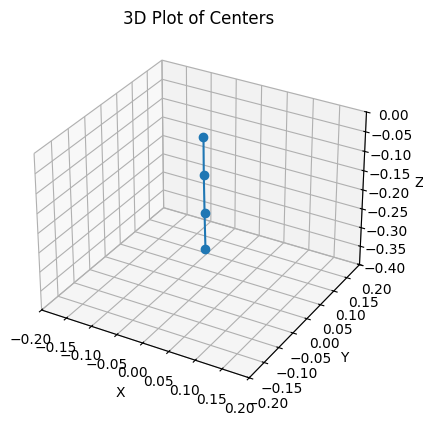

In [133]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(c[:, 0], c[:, 1], c[:, 2], marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of Centers')

ax.set_xlim([-0.2, 0.2])
ax.set_ylim([-0.2, 0.2])
ax.set_zlim([-0.4, 0.0])
plt.show()

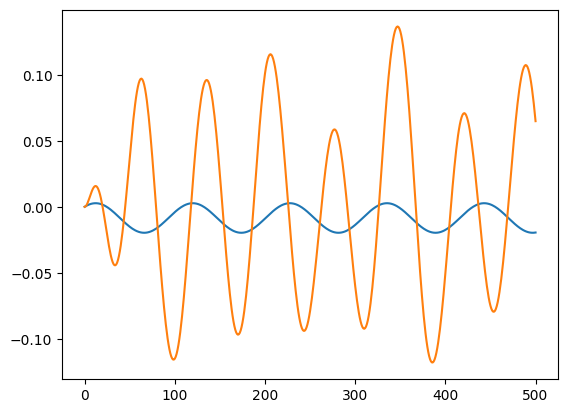

In [134]:
plt.plot(df['uy3']/1000 * 6 -(df['uy3'].iloc[0]/1000*6))

plt.plot(df['x4'] - df['x4'].iloc[0])


In [135]:
df['x4'] + df['vx4_new'] * 0.05 - df['x4_new']

0      0.001046
1      0.003459
2      0.005382
3      0.006783
4      0.007653
         ...   
496   -0.021369
497   -0.023785
498   -0.026007
499   -0.028015
500   -0.029792
Length: 501, dtype: float64